# Predicting IMDb Ratings Based on their Plot Summary and IMDB Data

**ABSTRACT**
  
Lorem Ipsum

In [217]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Regressors = {}
Hyperparams = {}

## I. Introduction

Producing a movie involves significant financial investment, often reaching hundreds of millions of dollars. Recent popular films such as Avenger: Endgame had estimated budgets of up to $356,000,000 [1]. Given such high costs, there is a significant risk associated with financing these productions. As such, there is significant value in developing a model which can mitigate this risk. 
A model which can predict a film project’s performance using pre-production features could help production companies make safer decisions regarding the films they finance. Additionally, such a model could help filmmakers get immediate feedback during their ideation phase. 

---

## II. Data Overview

The primary dataset used in this study consists of Film data from over 3000 movies from 2014-2024. To screen for very niche films, a review cap of 1000 is imposed. For each film, the following data were collected:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-0pky"><span style="font-weight:bold">Feature</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">Description</span></th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-0pky">Movie Title</td>
    <td class="tg-0pky">Movie title, as listed in IMDB</td>
  </tr>
  <tr>
    <td class="tg-0pky">Plot Summary</td>
    <td class="tg-0pky">A concatenation of all the plot summaries available for a film</td>
  </tr>
  <tr>
    <td class="tg-0pky">Ratings</td>
    <td class="tg-0pky">IMDB rating</td>
  </tr>
  <tr>
    <td class="tg-0lax">Budget</td>
    <td class="tg-0lax">Budget as listed in IMDB</td>
  </tr>
  <tr>
    <td class="tg-0lax">Runtime</td>
    <td class="tg-0lax">Movie Runtime in minutes</td>
  </tr>
  <tr>
    <td class="tg-0lax">Cast</td>
    <td class="tg-0lax">Comma-separated list of Actors</td>
  </tr>
  <tr>
    <td class="tg-0pky">Producers</td>
    <td class="tg-0pky">Comma-separated list of Producers</td>
  </tr>
  <tr>
    <td class="tg-0pky">Directors</td>
    <td class="tg-0pky">Comma-separated list of Directors</td>
  </tr>
  <tr>
    <td class="tg-0lax">Distributors</td>
    <td class="tg-0lax">Comma-separated list of Distributors</td>
  </tr>
  <tr>
    <td class="tg-0lax">Genre</td>
    <td class="tg-0lax">Comma-separated list of Genres</td>
  </tr>
</tbody></table>

---

## III. Methodology Overview

Movies are sampled from the IMDB website and collected via web scraping. We collect the features mentioned above. To above any leakage as a result of any data transformation, the test and non-test split is done this early in the process. In general, data transformations (e.g. PCA or TF-IDF) are fitted using the nontest data.
    
The Plot Summary is vectorized using TF-IDF. PCA is then applied to these token features to reduce the dimensionality of the data and possibly uncover latent features. Then, the following EDA plots would be used to uncover possible data errors, distribution trends, outliers:
- Word Clouds for each PC
- Distribution Plots (histogram or violin) for Ratings and Budget
- Biplots for the PC pairs
- Themes will be extracted by clustering on the PCA space
- Bivariate for Ratings and Budget

Various classification models are then trained on these features. To turn the target feature into a categorical variable, movies are classified into ‘good’ (above median) or ‘bad’ (below median). For the analysis of the models, the following will be used:
- Feature Weights Graph
- Performance Metrics
- Accuracy, Recall, and Precision
- Confusion Matrices

The final model will then be chosen based on the validation performance metrics.


---

## IV. Results

### Data Collection
The following notebook runs all the code related to the data collection:

In [218]:
%run Preprocessing.ipynb

DONE compiling


The code uses IMDB's advanced search page to compile a list of valid movie IDS. The following code controls for the parameters of the search:
```python
        params = {
            'title_type': 'feature',
            'num_votes': 1000,
            'primary_language': 'en',
            'sort': 'year,asc',
            'release_date': f"{start_date},{end_date}"
        }
```
To make the code robust to errors, the search was distributed over 5 notebooks. Each notebook was set to search for 2 years, for a total of 10 years worth of movies. This amounts to over 3000 datapoints and 12 columns (not counting the Unnamed Columns). These separate searches are then compiled into a single csv: *raw_complete.csv*

In [219]:
data = pd.read_csv('raw_complete.csv')
data

,Unnamed: 0.1,Unnamed: 0,Title,Year,Plot,Rating,Budget,Cast,MPA Rating,Directors,Distributors,Producers,Genre,Runtime in Minutes
0,0,0,1. Whiplash,2014,A promising young drummer enrolls at a cut-thr...,8.5,"$3,300,000 (estimated)","Miles Teller,J.K. Simmons,Paul Reiser,Melissa ...",TV-14,Damien Chazelle,"Sony Pictures Classics,Sony Pictures Worldwide...","Bold Films,Blumhouse Productions,Right of Way ...","Drama,Music",106
1,1,1,2. RoboCop,2014,"In 2028 Detroit, when Alex Murphy, a loving hu...",6.1,"$100,000,000 (estimated)","Joel Kinnaman,Gary Oldman,Michael Keaton,Abbie...",TV-14,José Padilha,"Columbia Pictures,ACME,ACME,ACME,B&H Film Dist...","Metro-Goldwyn-Mayer (MGM),Columbia Pictures,St...","Action,Crime,Sci-Fi,Thriller",117
2,2,2,3. The Babadook,2014,A single mother and her child fall into a deep...,6.8,"$2,000,000 (estimated)","Essie Davis,Noah Wiseman,Hayley McElhinney,Dan...",Not,Jennifer Kent,"Capelight Pictures,Cinecolor Films,Feelgood En...","Screen Australia,Causeway Films,The South Aust...","Drama,Horror,Mystery",94
3,3,3,4. What We Do in the Shadows,2014,"Viago, Deacon, and Vladislav are vampires who ...",7.6,"$1,600,000 (estimated)","Jemaine Clement,Taika Waititi,Jonny Brugh,Cori...",R,"Jemaine Clement,Taika Waititi","Benuca Films,Cinetren,Festival Films / Yedra F...","Unison Films,Defender Films,Park Road Post Pro...","Comedy,Horror",86
4,4,4,5. Boyhood,2014,"The life of Mason, from early childhood to his...",7.9,"$4,000,000 (estimated)","Ellar Coltrane,Patricia Arquette,Elijah Smith,...",TV-14,Richard Linklater,"Diaphana Distribution,IFC Films,Lumière,Lumièr...","IFC Productions,Detour Filmproduction",Drama,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,3239,872,10. F*** Marry Kill,2024,As a serial killer targets women on dating app...,5.3,NaN,"Lucy Hale,Virginia Gardner,Brooke Nevin,Samer ...",R,Laura Murphy,"Lionsgate,Amazon Prime Video,Apple TV+,SPI Int...","Buzzfeed Studios,BondIt Media Capital,CR8IV DNA","Comedy,Mystery,Romance,Thriller",97
3240,3240,873,11. Dirty Angels,2024,It centers on a group of female soldiers who d...,4.3,NaN,"Eva Green,Maria Bakalova,Ruby Rose,Reza Brojer...",R,Martin Campbell,"Gravel Road Distribution Group,Pioneer Films,T...","I Road Productions,Millennium Media,Nu Boyana ...","Action,Drama,Thriller,War",104
3241,3241,874,12. Mary,2024,"In this timeless coming-of-age story, Mary is ...",5.2,NaN,"Noa Cohen,Ido Tako,Ori Pfeffer,Hilla Vidor,Dud...",TV-14,D.J. Caruso,"Netflix,Arna Media,Atmosfera Kino,Svoe Kino,Ne...","Aloe Entertainment,Creativity Media,FitzHenry ...",Drama,112
3242,3242,875,14. Jamie Foxx: What Had Happened Was...,2024,A stand-up special with Jamie Foxx performing ...,5.8,NaN,"Jamie Foxx,Craig Brockman,Nisan Stewart,Bennet...",TV-MA,Hamish Hamilton,"Netflix,Netflix","Done and Dusted Productions,Foxxhole Productio...","Documentary,Comedy",68


The extraneous, unnamed columns are dropped since they add nothing to the dataset.

In [220]:
data.drop(data.columns[[0,1]], axis=1, inplace=True)
data.head(2)

,Title,Year,Plot,Rating,Budget,Cast,MPA Rating,Directors,Distributors,Producers,Genre,Runtime in Minutes
0,1. Whiplash,2014,A promising young drummer enrolls at a cut-thr...,8.5,"$3,300,000 (estimated)","Miles Teller,J.K. Simmons,Paul Reiser,Melissa ...",TV-14,Damien Chazelle,"Sony Pictures Classics,Sony Pictures Worldwide...","Bold Films,Blumhouse Productions,Right of Way ...","Drama,Music",106
1,2. RoboCop,2014,"In 2028 Detroit, when Alex Murphy, a loving hu...",6.1,"$100,000,000 (estimated)","Joel Kinnaman,Gary Oldman,Michael Keaton,Abbie...",TV-14,José Padilha,"Columbia Pictures,ACME,ACME,ACME,B&H Film Dist...","Metro-Goldwyn-Mayer (MGM),Columbia Pictures,St...","Action,Crime,Sci-Fi,Thriller",117


### Data Split
To validate our data, we would need a test set. To ensure that this test set has absolutely no effect on our model, we split this as early as possible. We allocate 20% of our dataset to the test set.

In [221]:
#Target Feature
target = ["Rating"]

#Make features everything but the target
features = list(data.columns)
features.remove(target[0])
feature_dict = {}


# Split data -> nontest & test
x_nontest, x_test, y_nontest, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=1337)
print(f'Nontest size: {len(x_nontest)}')
print(f'Test size: {len(x_test)}')

Nontest size: 2595
Test size: 649


### Feature Extraction
To extract the budget feature, we use regex to get the numerical values. If the values are not in USD, they are set to 'N/A'.

In [222]:
x_nontest['Budget'] = x_nontest['Budget'].str.replace(',', '', regex=False).str.extract(r'\$(\d+)')
budget = pd.to_numeric(x_nontest['Budget'], errors='coerce')
x_nontest['Budget'] = budget

x_test['Budget'] = x_test['Budget'].str.replace(',', '', regex=False).str.extract(r'\$(\d+)')
budget = pd.to_numeric(x_test['Budget'], errors='coerce')
x_test['Budget'] = budget

print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.tail(2)

Dataset is now 11-dimensional


,Title,Year,Plot,Budget,Cast,MPA Rating,Directors,Distributors,Producers,Genre,Runtime in Minutes
593,23. Brothers of the Wind,2015,"In a world where it takes courage to fly, a yo...",NaN,"Jean Reno,Tobias Moretti,Manuel Camacho,Eva Ku...",TV-G,"Gerardo Olivares,Otmar Penker","Crystalsky Multimedia,Légende Distribution,War...","FilmVergnuegen,Terra Mater Factual Studios","Adventure,Drama,Family",98
2919,5. The Marvels,2023,Carol Danvers gets her powers entangled with t...,220000000.0,"Brie Larson,Teyonah Parris,Iman Vellani,Samuel...",PG-13,Nia DaCosta,"Walt Disney Studios Motion Pictures,Walt Disne...",Marvel Studios,"Action,Adventure,Sci-Fi",105


We then vectorizer the plot summary using TF-IDF. We also ignore stop words to make our analysis, training, and interpretation easier. However, as we can see, this blows up the dimensions of the dataset.


In [223]:
vectorizer = TfidfVectorizer(token_pattern =r'[a-zA-Z]+', stop_words=list(sklearn.feature_extraction.text.ENGLISH_STOP_WORDS))
vectorizer.fit(x_nontest['Plot'])
tokens = vectorizer.get_feature_names_out()
feature_dict['tokens'] = list(tokens)

nontestIDF = vectorizer.transform(x_nontest['Plot'])
x_nontest_wordvec = pd.DataFrame(nontestIDF.toarray(), columns=tokens, index=x_nontest.index)
x_nontest_temp = pd.concat([x_nontest, x_nontest_wordvec], axis=1)


testIDF = vectorizer.transform(x_test['Plot'])
x_test_wordvec = pd.DataFrame(testIDF.toarray(), columns=tokens, index=x_test.index)
x_test_temp = pd.concat([x_test, x_test_wordvec], axis=1)

print(f'Dataset is now {len(x_test_temp.columns)}-dimensional')
x_test.head(2)

Dataset is now 26503-dimensional


,Title,Year,Plot,Budget,Cast,MPA Rating,Directors,Distributors,Producers,Genre,Runtime in Minutes
3208,1. A Complete Unknown,2024,"In 1961, an unknown 19-year-old Bob Dylan arri...",70000000.0,"Timothée Chalamet,Joe Tippett,Edward Norton,Er...",R,James Mangold,"Searchlight Pictures,Walt Disney Studios Motio...","Searchlight Pictures,The Picture Company,Range...","Biography,Drama,Music",141
2265,24. The Girl Who Got Away,2021,A female serial killer escapes from prison to ...,NaN,"Lexi Johnson,Chukwudi Iwuji,Kaye Tuckerman,Tim...",TV-MA,Michael Morrissey,Quiver Distribution,"Boy Wonder Productions,Lords Of Magic","Horror,Thriller",116


As with stop words, we can remove very infrequent words as it is unlikely that our model will actually learn anything from them. We can make the arbitrary decision to remove terms that appear in less than $0.1\%$ of the corpus.

In [224]:
vectorizer = TfidfVectorizer(token_pattern =r'[a-zA-Z]+', min_df=0.001, stop_words=list(sklearn.feature_extraction.text.ENGLISH_STOP_WORDS))
vectorizer.fit(x_nontest['Plot'])
tokens = vectorizer.get_feature_names_out()
feature_dict['tokens'] = list(tokens)

nontestIDF = vectorizer.transform(x_nontest['Plot'])
x_nontest_wordvec = pd.DataFrame(nontestIDF.toarray(), columns=tokens, index=x_nontest.index)
x_nontest = pd.concat([x_nontest, x_nontest_wordvec], axis=1)
x_nontest.drop(columns=['Plot'], inplace=True)

testIDF = vectorizer.transform(x_test['Plot'])
x_test_wordvec = pd.DataFrame(testIDF.toarray(), columns=tokens, index=x_test.index)
x_test = pd.concat([x_test, x_test_wordvec], axis=1)
x_test.drop(columns=['Plot'], inplace=True)

print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.head(2)

Dataset is now 10563-dimensional


,Title,Year,Budget,Cast,MPA Rating,Directors,Distributors,Producers,Genre,Runtime in Minutes,...,zealots,zealous,zellweger,zero,zoe,zoey,zombie,zombies,zone,zoo
3208,1. A Complete Unknown,2024,70000000.0,"Timothée Chalamet,Joe Tippett,Edward Norton,Er...",R,James Mangold,"Searchlight Pictures,Walt Disney Studios Motio...","Searchlight Pictures,The Picture Company,Range...","Biography,Drama,Music",141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2265,24. The Girl Who Got Away,2021,NaN,"Lexi Johnson,Chukwudi Iwuji,Kaye Tuckerman,Tim...",TV-MA,Michael Morrissey,Quiver Distribution,"Boy Wonder Productions,Lords Of Magic","Horror,Thriller",116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, we go through a similar process for the comma-delimited values. However, we use bag-of-words vectorization. Since an actor, director, distributor, or producer can only appear a maximum of one time in a given list, this gives us an easier interpretation of the variables as a binary variable of their presence in the film. We also only consider the top 100 most prominent, as determined by document frequency, of each category. This gives us 100 unique values for each category, except genre which has 20.

In [225]:
to_be_encoded = ['Cast', 'Directors', 'Distributors', 'Producers', 'Genre']

for feat in to_be_encoded:
    vectorizer = CountVectorizer(token_pattern =r'(.+?),', max_features = 100)
    vectorizer.fit(x_nontest[feat])
    tokens = vectorizer.get_feature_names_out()
    feature_dict[feat] = list(tokens)
    
    nontestIDF = vectorizer.transform(x_nontest[feat])
    x_nontest_wordvec = pd.DataFrame(nontestIDF.toarray(), columns=tokens, index=x_nontest.index)
    x_nontest = pd.concat([x_nontest, x_nontest_wordvec], axis=1)
    
    
    testIDF = vectorizer.transform(x_test[feat])
    x_test_wordvec = pd.DataFrame(testIDF.toarray(), columns=tokens, index=x_test.index)
    x_test = pd.concat([x_test, x_test_wordvec], axis=1)
    


x_nontest.drop(columns=to_be_encoded, inplace=True)
x_test.drop(columns=to_be_encoded, inplace=True)
print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.head(2)

Dataset is now 10978-dimensional


,Title,Year,Budget,MPA Rating,Runtime in Minutes,aaron,abandon,abandoned,abandoning,abandons,...,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war
3208,1. A Complete Unknown,2024,70000000.0,R,141,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2265,24. The Girl Who Got Away,2021,NaN,TV-MA,116,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


The final feature to be encoded is the MPA Rating. We can treat the MPAA Rating as an ordinal value. The rating can be ranked based on its exclusiveness, as listed in [MPAA's Website](https://www.filmratings.com/). Non-MPAA ratings or missing ones are assigned the highest value. This is because most theathers will refuse to screen films missing an [MPAA certificate](https://www.vox.com/culture/2018/10/29/18037982/mpaa-r-rating-report-50-years-criticism).

In [226]:
Ratings = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17':5}

x_nontest['MPA Rating'] = x_nontest['MPA Rating'].map(Ratings)
x_nontest['MPA Rating'] = x_nontest['MPA Rating'].fillna(6)

x_test['MPA Rating'] = x_test['MPA Rating'].map(Ratings)
x_test['MPA Rating'] = x_test['MPA Rating'].fillna(6)

print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.head(2)

Dataset is now 10978-dimensional


,Title,Year,Budget,MPA Rating,Runtime in Minutes,aaron,abandon,abandoned,abandoning,abandons,...,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war
3208,1. A Complete Unknown,2024,70000000.0,4.0,141,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2265,24. The Girl Who Got Away,2021,NaN,6.0,116,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


### Initial EDA (For Data Cleaning)
Before we do any transformation to our features, we first need to look at their underlying distributions. This EDA also allows us to spot erroneous data and clean them. We start with our target feature, the IMDB ratings. The code for the data visualizations are encapsulated in functions coded in the *eda1.ipynb* notebook.

In [227]:
%run eda1.ipynb

Successfully Imported


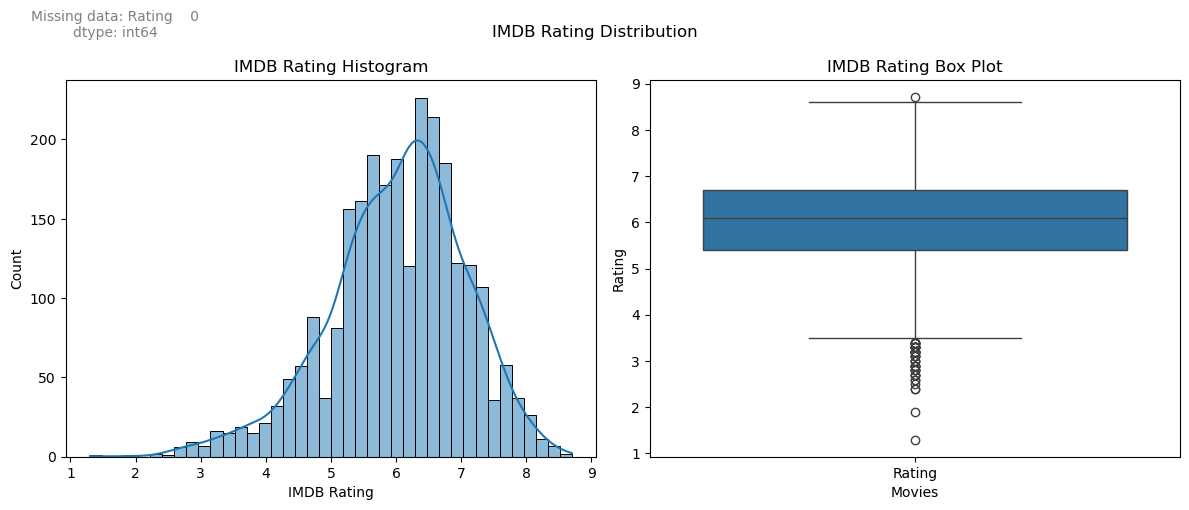

In [228]:
show_rating_distribution(y_nontest)

Figure *x* shows us the distribution of IMDB Ratings. We can see that it is approximately normal, albeit with some skewness towards the left. There are also outlying values. However, as they fall within the valid values for IMDB Ratings, there is no sufficient reason to conclude that these are erroneous. We can then move on to the target features.

Starting with the budget. We can visualize its distribution using the same tools as above.

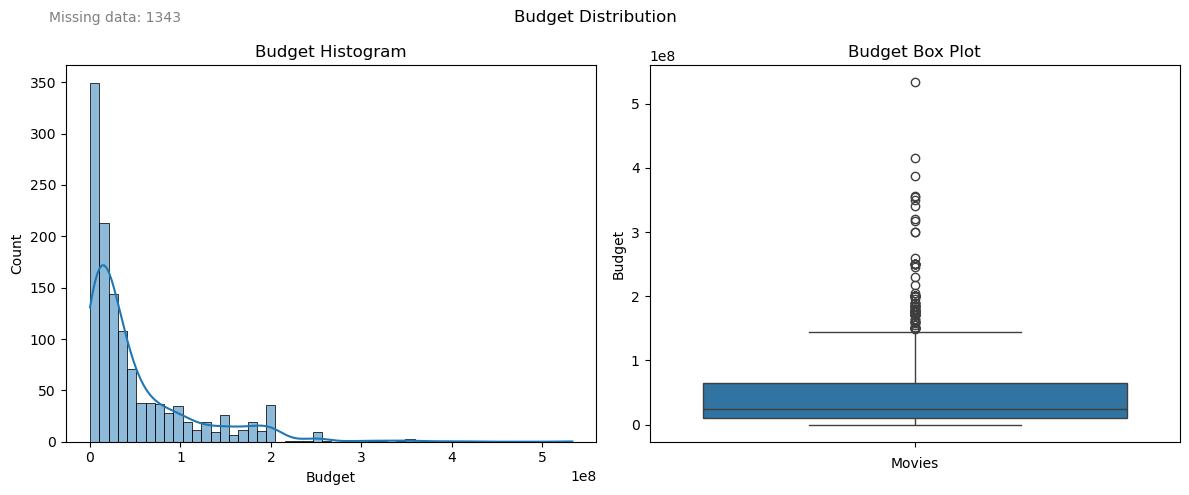

In [229]:
show_budget_hist(x_nontest['Budget'])

We can see that the budget is highly skewed. The distribution is being skewed by outlying movies with a lot of budget. We can quickly investigate these outliers to see if they are potentially erroneous. Another important thing to note is that there are over 1300 missing data points for this variable.

In [230]:
# Calculate quartiles and IQR
Q1 = x_nontest['Budget'].quantile(0.25)
Q3 = x_nontest['Budget'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers_iqr = x_nontest[(x_nontest['Budget'] < lower_bound) | (x_nontest['Budget'] > upper_bound)]
outliers_iqr.sort_values(by=['Budget']).tail(10)

,Title,Year,Budget,MPA Rating,Runtime in Minutes,aaron,abandon,abandoned,abandoning,abandons,...,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war
2119,2. Zack Snyder's Justice League,2021,300000000.0,4.0,242,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1164,3. Star Wars: Episode VIII - The Last Jedi,2017,317000000.0,3.0,152,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1260,1. Avengers: Infinity War,2018,321000000.0,3.0,149,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2768,2. Fast X,2023,340000000.0,3.0,141,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2643,2. Avatar: The Way of Water,2022,350000000.0,3.0,192,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2770,4. The Little Mermaid,2023,355100000.0,2.0,135,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1557,1. Avengers: Endgame,2019,356000000.0,3.0,181,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2772,6. Indiana Jones and the Dial of Destiny,2023,387200000.0,3.0,154,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2472,6. Doctor Strange in the Multiverse of Madness,2022,414900000.0,3.0,126,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
573,3. Star Wars: Episode VII - The Force Awakens,2015,533000000.0,3.0,138,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
x_nontest.loc[2770, 'Budget'] = 40_000_000
x_nontest.loc[573, 'Budget'] = 245_000_000

After informally checking with the actual IMDB page, the following budgets were found to be erroneous:
- The Little Mermaid (actual is 40,000,000)
- Star Wars: Episode VII - The Force Awakens (actual is 245,000,000)

The same analysis was done on the test data, but no erroneous data were found.
The next feature is the MPA Rating.

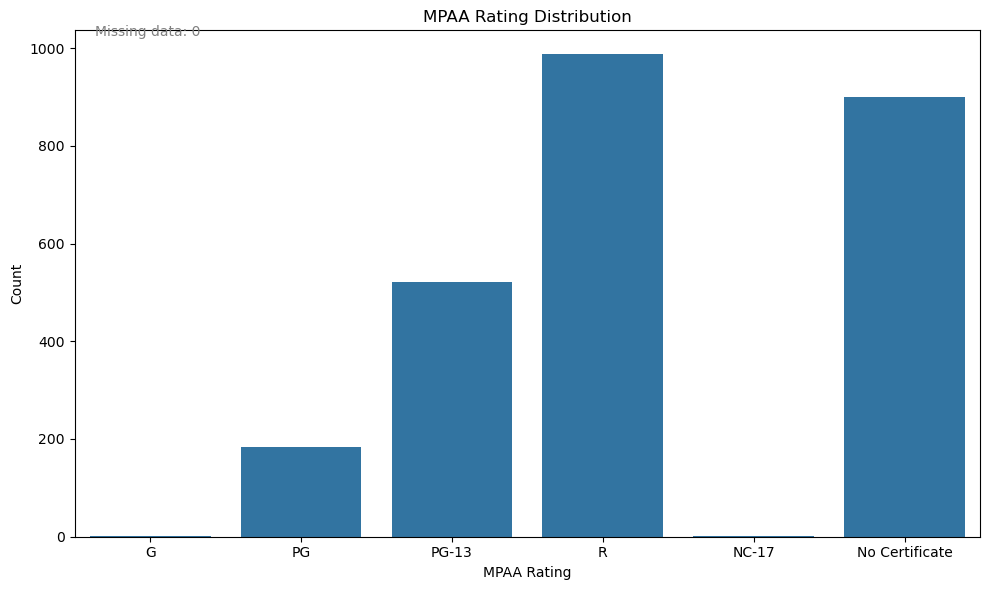

In [232]:
show_mpa_hist(x_nontest['MPA Rating'])

We can see an interesting pattern arise from the MPAA Ratings. The more exclusive ratings tend to have more films under them---except for NC-17. This makes sense considering that a lot of theaters flat out refuse to show movies under that [classification](https://www.vox.com/culture/2018/10/29/18037982/mpaa-r-rating-report-50-years-criticism).

We now move on to the Runtime Distribution.

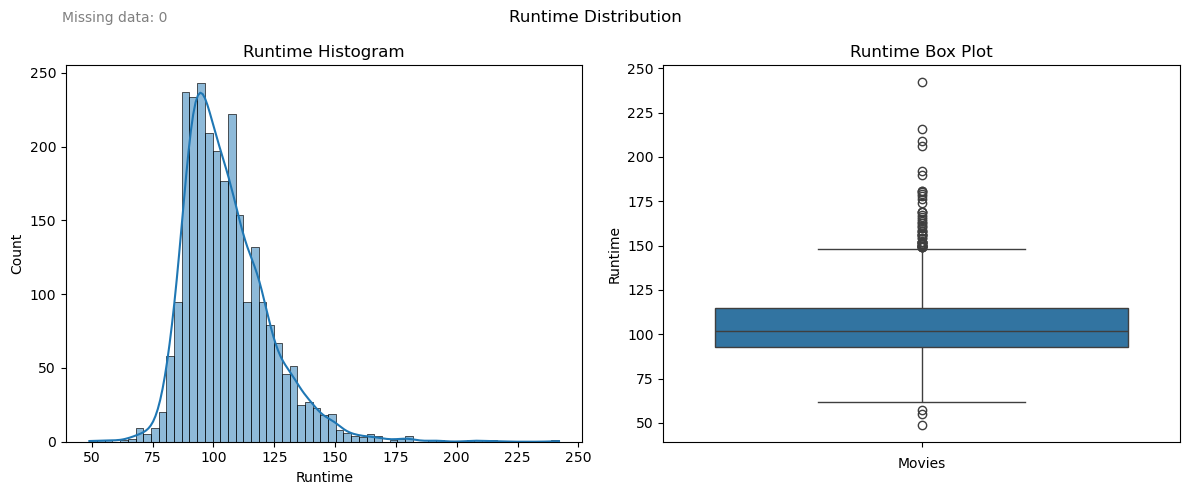

In [233]:
show_runtime_distribution(x_nontest['Runtime in Minutes'])

In [234]:
# Calculate quartiles and IQR
Q1 = x_nontest['Runtime in Minutes'].quantile(0.25)
Q3 = x_nontest['Runtime in Minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers_iqr = x_nontest[(x_nontest['Runtime in Minutes'] < lower_bound) | (x_nontest['Runtime in Minutes'] > upper_bound)]
outliers_iqr.sort_values(by=['Runtime in Minutes']).tail(1)

,Title,Year,Budget,MPA Rating,Runtime in Minutes,aaron,abandon,abandoned,abandoning,abandons,...,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war
2119,2. Zack Snyder's Justice League,2021,300000000.0,4.0,242,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


We can see a slight skew in the distribution of the runtime. We can see very outliers with very high runtimes. However, just by looking at the max data point, we can confirm that these runtimes are indeed possible. *Zack Snyder's Justice League* is famously (or infamously) over 4 hours long.

We then move on to the comma-delimited values.

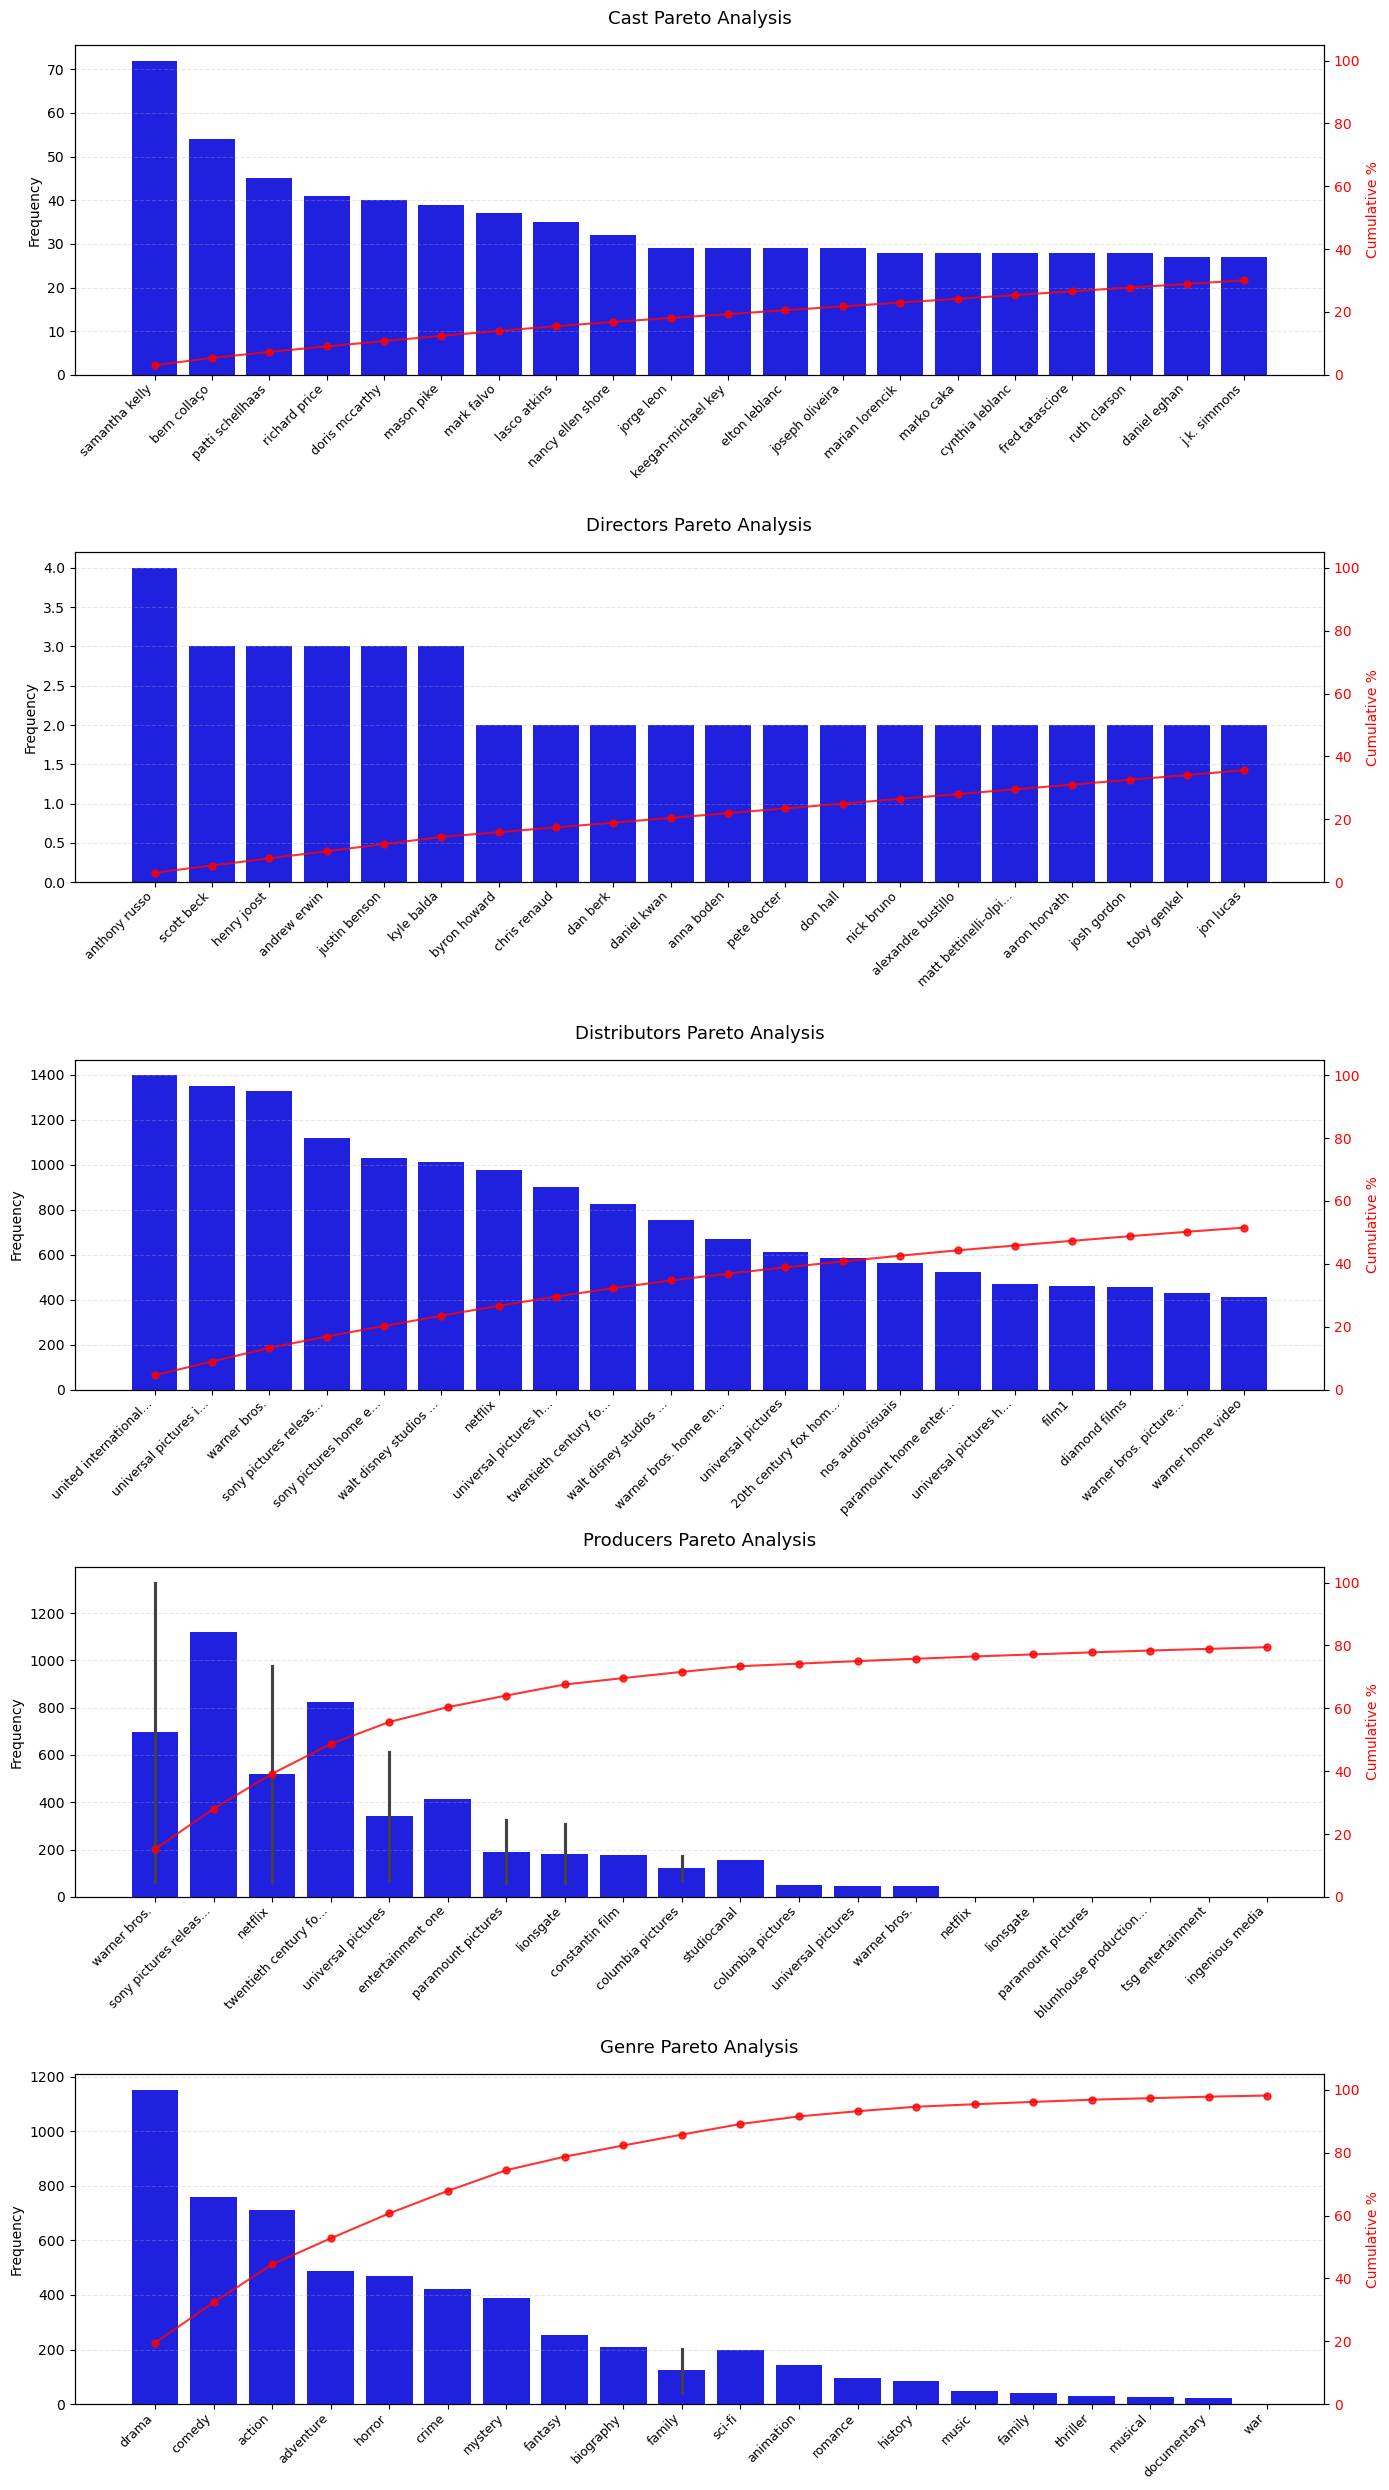

In [235]:
plot_pareto_charts(x_nontest, feature_dict)

From the pareto plots above, we can see the relative distributions of each categorical feature. We can see that Cast and Directors are pretty diverse, with the top 20 only making just above 30% of the total appearances. On the other hands, distributors and producers tend to have much more concentrated frequencies. We can see that the top 20 distributors account for half of the distributions, while the top 20 production companies account for 80% of the films.

Now we move on to our summary feature. To visualize the relative importances of the tokens, we can use a wordcloud. The size of the word is proportional to its average TF-IDF value.

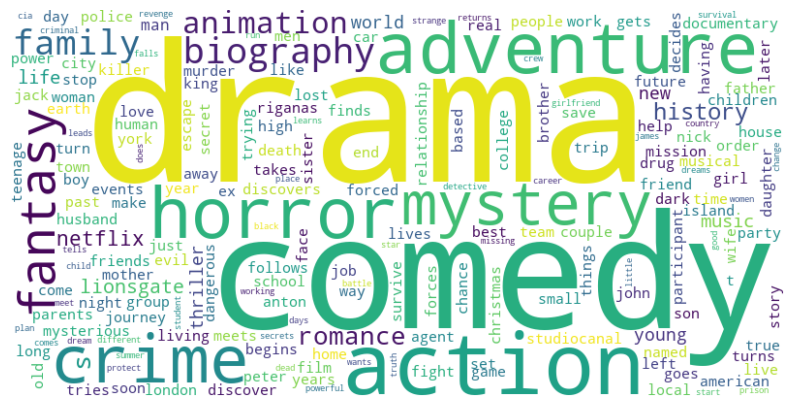

In [236]:
show_token_distribution(x_nontest[feature_dict['tokens']])

We can see very clearly from figure *x* that the words which correspond to genres are prominent in plot summaries. Words like 'drama', 'comedy', and 'action' are examples of this. Given that we already have a feature that accounts for the genre, this may suggest further preprocessing is needed.

### Data Transformations
Guided by the EDA, we can now proceed to transform the data before we train. The first transformation we will do is to turn the 'Ratings' feature into a categorical variable. The rationale behind this transformation is to turn the problem into a classification problem. We use the median to classify the movies into 'good' (above the median) and 'bad' (below the median). This makes our interpretation easier and it gives us balanced classes.

In [237]:
%run eda2.ipynb

Defaulting to user installation because normal site-packages is not writeable
Successfully Imported


In [238]:
# Calculate dynamic bin edges
min_val = y_nontest['Rating'].min()
max_val = y_nontest['Rating'].max()
q1 = y_nontest['Rating'].quantile(0.25)
q2 = y_nontest['Rating'].quantile(0.50)
q3 = y_nontest['Rating'].quantile(0.75)

# Create bins with these values
bins = [min_val, q2, max_val]

# Use pd.cut to assign categorical labels based on the computed bins
y_nontest['Rating'] = pd.cut(
    y_nontest['Rating'],
    bins=bins,
    labels=['bad','good'],
    include_lowest=True
)

y_test['Rating'] = pd.cut(
    y_test['Rating'],
    bins=bins,
    labels=['bad','good'],
    include_lowest=True
)

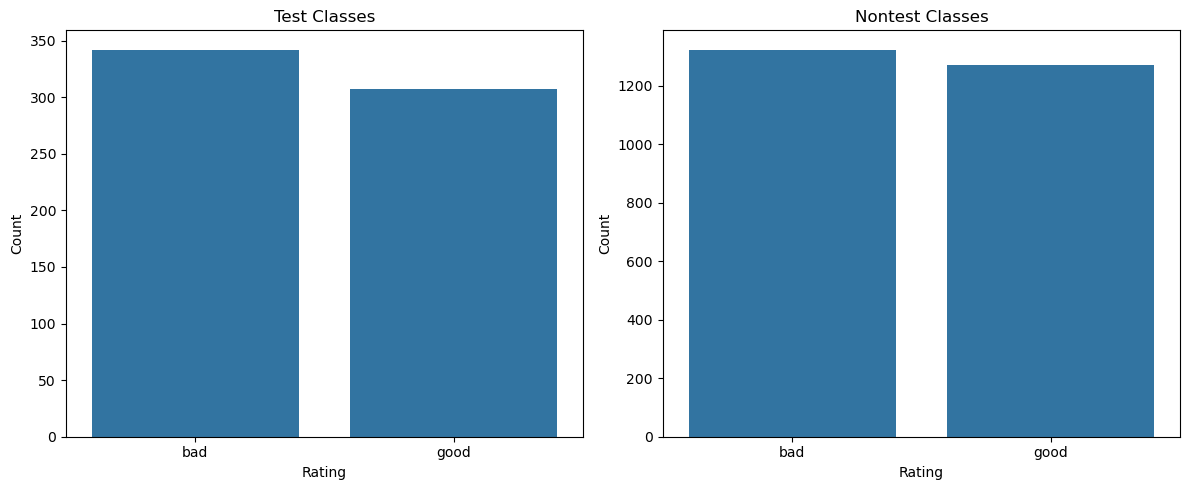

In [239]:
plot_two_countplots(y_test, y_nontest)

This gives us two, relatively balanced classes.
    
Moving on to the predictors, we can reduce the dimensionality of the sparse TF-IDF vectors by doing Principal Component Analysis.

In [240]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
tokens = feature_dict['tokens']

# Initialize PCA with the variance threshold
pca = PCA()

# Fit PCA on the scaled non-test data
pca.fit(x_nontest[tokens])

# Transform both non-test and test data using the fitted PCA
x_nontest_pca = pca.transform(x_nontest[tokens])
x_test_pca = pca.transform(x_test[tokens])

# Generate names for the principal components
pca_columns = [f'PC{i+1}' for i in range(x_nontest_pca.shape[1])]

# Replace original features with PCA components in the DataFrames
x_nontest_copy = x_nontest.copy()
x_nontest = pd.concat([
    x_nontest.drop(columns=tokens),
    pd.DataFrame(x_nontest_pca, columns=pca_columns, index=x_nontest.index)
], axis=1)

x_test = pd.concat([
    x_test.drop(columns=tokens),
    pd.DataFrame(x_test_pca, columns=pca_columns, index=x_test.index)
], axis=1)

feature_dict['PCS'] = pca_columns

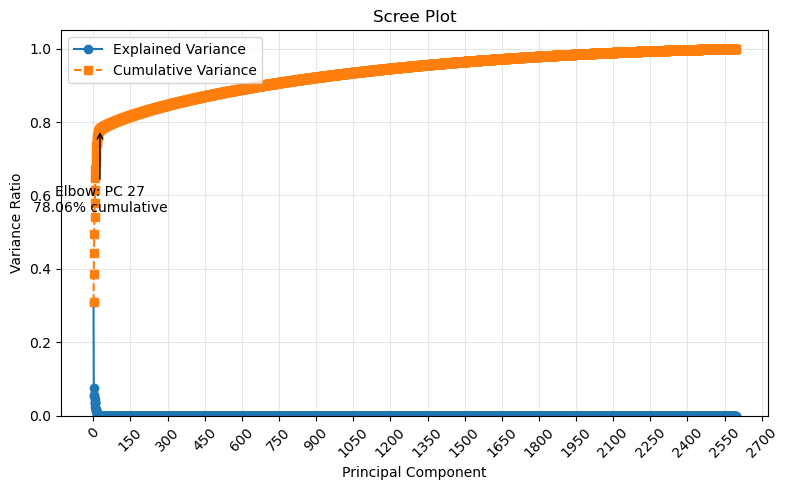

(27, 0.7806087124449731)

In [241]:
plot_scree(pca)

In [242]:
x_nontest.drop(x_nontest[feature_dict['PCS']].columns[27:], axis=1, inplace=True)
x_test.drop(x_test[feature_dict['PCS']].columns[27:], axis=1, inplace=True)

In [243]:
feature_dict['PCS'] = pca_columns[:27]

In [244]:
x_nontest.tail(2)

,Title,Year,Budget,MPA Rating,Runtime in Minutes,adam sandler,anthony mackie,anthony molinari,arnold montey,attila g. kerekes,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
189,18. Wolves,2014,18000000.0,4.0,91,0,0,0,0,0,...,0.023943,-0.017339,-0.065101,0.003849,-0.007711,0.012507,0.004595,-0.024134,0.109052,0.036419
3223,16. Levels,2024,NaN,4.0,93,0,0,0,0,0,...,0.003592,0.011168,-0.020389,-0.021476,-0.009305,-0.004691,-0.000850,-0.014145,0.024006,-0.023628


We can see that the first 27 principal components are able to capture 78% of the variance in the original plot summary space. We can drop the rest of the PCs in order to reduce the dimensionality of our data.

We then move to the budget. We have already cleaned this but we still have the problem of the missing values. Additionally, given the timescale of the data, we need to account for inflation. Thankfully, we have already scraped the data from the worldbank. Using 2015 as our base year (since this is the base year of the US data), we can compute for the deflated budget as follows:
                                                                                                                                                                                                                                                                                                           $$
\text{Real Price}_t = \text{Nominal Price}_t \times \frac{\text{Index}_{2015}}{\text{Index}_t}
$$
                                                                                                                                                                                                            
The data is missing for 2024. However, since prices don't tend to change much over shorter time periods, we can approximate the 2024 deflator with the 2023 one.

In [245]:
deflators = pd.read_csv('deflators.csv')
deflators = deflators.drop(columns=["Unnamed: 0", "Country Name", "Country Code", "Indicator Name", "Indicator Code", "Unnamed: 69"])

# Reshape deflators to have years as rows (assuming deflators has one row)
deflators_series = deflators.T.squeeze()
deflators_series.index = deflators_series.index.astype(int)  # Convert index to integer for matching
deflators_series[2024] = deflators_series[2023]

# Calculate adjusted budget
adjusted = x_nontest["Budget"] * deflators_series[2015] / x_nontest["Year"].map(deflators_series)
x_nontest["Budget"] =  adjusted

This gives us the following distribution

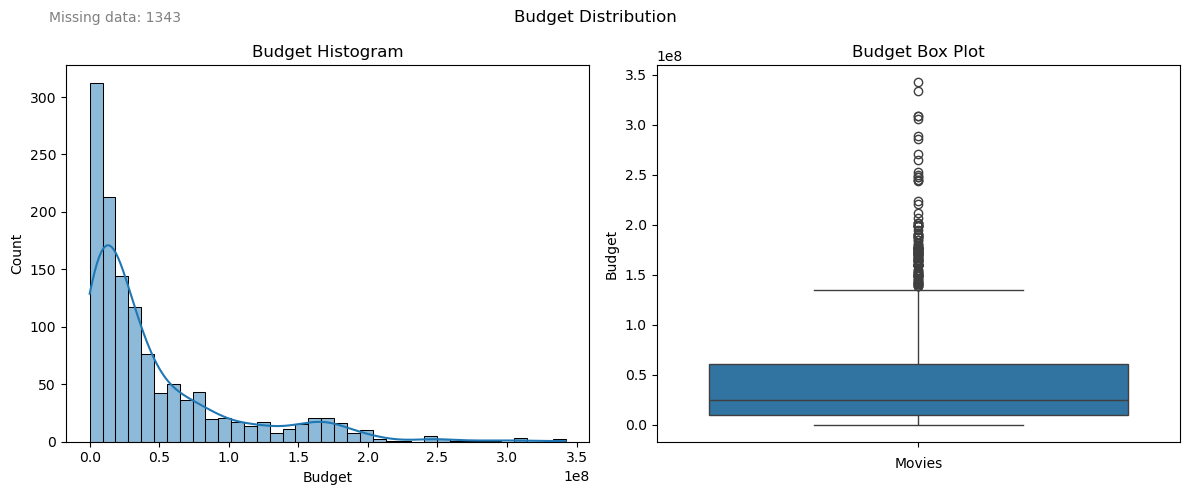

In [246]:
show_budget_hist(x_nontest['Budget'])

As the budget data is still skewed, we could impute budget using the median. However, this would highly skew the average if we do a standard scaling later on. To adress this, we do a similar transormation to our target feature. We use the quartiles of the non-imputed data to determine the bins. These roughly correspond to levels of budget. We then impute using the median and then transform the feature into an ordinal feature through mapping

In [247]:
# Calculate dynamic bin edges
min_val = x_nontest['Budget'].min()
max_val = x_nontest['Budget'].max()
q1 = x_nontest['Budget'].quantile(0.25)
q2 = x_nontest['Budget'].quantile(0.50)
q3 = x_nontest['Budget'].quantile(0.75)

# Create bins with these values
bins = [min_val, q1, q2, q3, max_val]
median = x_nontest['Budget'].median()
x_nontest['Budget'] = x_nontest['Budget'].fillna(median)
x_test['Budget'] = x_test['Budget'].fillna(median)

# Use pd.cut to assign categorical labels based on the computed bins
x_nontest['Budget'] = pd.cut(
    x_nontest['Budget'],
    bins=bins,
    labels=[1,2,3,4],
    include_lowest=True
)

x_test['Budget'] = pd.cut(
    x_test['Budget'],
    bins=bins,
    labels=[1,2,3,4],
    include_lowest=True
)

x_nontest

,Title,Year,Budget,MPA Rating,Runtime in Minutes,adam sandler,anthony mackie,anthony molinari,arnold montey,attila g. kerekes,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
1226,16. Level 16,2018,2,6.0,102,0,0,0,0,0,...,-0.007490,-0.012802,0.003860,-0.001672,-0.014115,-0.012005,0.004733,-0.001331,-0.063005,0.187672
2379,13. Am I OK?,2022,2,4.0,86,0,0,0,0,0,...,0.021211,-0.027098,-0.002369,0.015946,0.003452,0.017326,-0.004793,0.006300,-0.020996,0.015390
1089,1. It,2017,3,6.0,135,0,0,0,0,0,...,0.004491,-0.010826,-0.005508,-0.032177,-0.041880,-0.005986,-0.007677,-0.012775,-0.048868,-0.019278
2308,17. The Free Fall,2021,2,6.0,82,0,0,0,0,0,...,-0.000353,-0.030361,-0.025498,0.004137,0.012267,0.014565,-0.006659,-0.004336,0.003621,-0.059606
792,22. Cruel Summer,2016,2,6.0,80,0,0,0,0,0,...,-0.002940,-0.026790,-0.028181,0.003162,0.014946,-0.001536,-0.003579,0.004995,-0.052181,0.004914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,10. F*** Marry Kill,2024,2,4.0,97,0,0,0,0,0,...,-0.090184,-0.033375,-0.037133,0.004263,-0.002064,0.002107,0.005714,-0.002780,-0.038078,-0.017066
1256,21. The Delinquent Season,2018,2,4.0,103,0,0,0,0,0,...,0.010603,-0.023584,-0.020889,-0.009335,-0.008565,-0.000213,-0.005654,0.001017,0.030510,-0.026833
860,15. True Memoirs of an International Assassin,2016,3,6.0,98,0,0,0,0,0,...,0.013271,0.000945,-0.039741,-0.007137,0.004781,-0.009339,-0.002205,0.003882,-0.034019,-0.025972
189,18. Wolves,2014,2,4.0,91,0,0,0,0,0,...,0.023943,-0.017339,-0.065101,0.003849,-0.007711,0.012507,0.004595,-0.024134,0.109052,0.036419


Finally, we scale the Runtime in Minutes since it is in a very different scale from the rest of the features. Since this feature is skewed to the right. We do a log transformation:

In [248]:
x_nontest['Runtime in Minutes'] = np.log(x_nontest['Runtime in Minutes'])
x_test['Runtime in Minutes'] = np.log(x_test['Runtime in Minutes'])

In [249]:
from sklearn.preprocessing import StandardScaler
#Scaler, use either Standard or Min Max
#Cuztomizable
Scaler = StandardScaler()

#Scale the data using the scaler
#We make sure not to use the test set
#to avoid data leakage
Scaler = Scaler.fit(x_nontest[['Runtime in Minutes']])
x_nontest[['Runtime in Minutes']] = Scaler.transform(x_nontest[['Runtime in Minutes']])
x_test[['Runtime in Minutes']] = Scaler.transform(x_test[['Runtime in Minutes']])

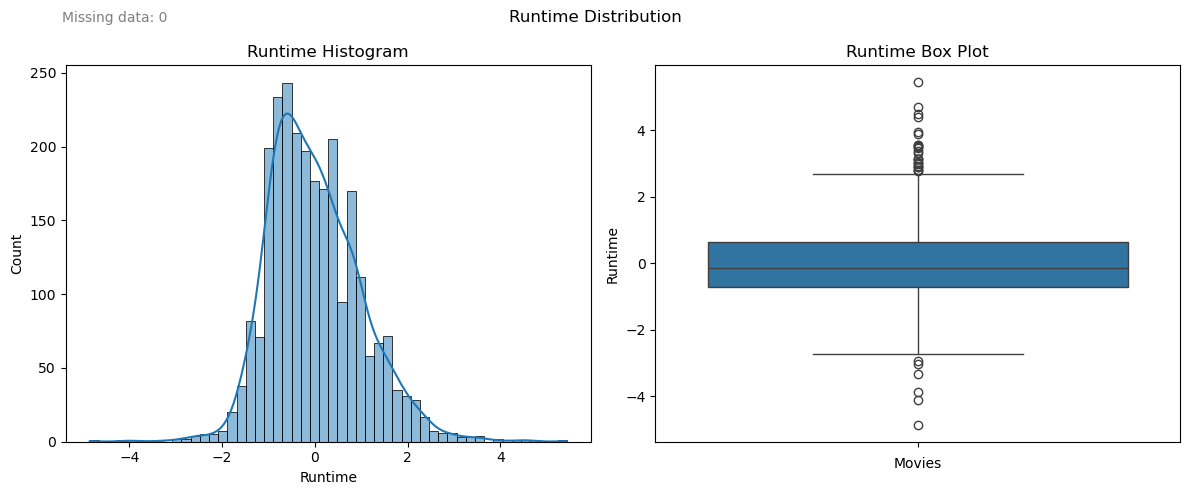

In [250]:
show_runtime_distribution(x_nontest['Runtime in Minutes'])

We see that this normalized the feature and made the magnitudes more simillar to the other features. Finally, we drop non-essential features like Title and Year.

In [251]:
x_nontest = x_nontest.drop(columns=['Title', 'Year'])
x_test = x_test.drop(columns=['Title', 'Year'])

In [252]:
x_nontest.tail(2)

,Budget,MPA Rating,Runtime in Minutes,adam sandler,anthony mackie,anthony molinari,arnold montey,attila g. kerekes,bern collaço,bernardo santos,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
189,2,4.0,-0.867160,0,0,0,0,0,0,0,...,0.023943,-0.017339,-0.065101,0.003849,-0.007711,0.012507,0.004595,-0.024134,0.109052,0.036419
3223,2,4.0,-0.727125,0,0,0,0,0,0,0,...,0.003592,0.011168,-0.020389,-0.021476,-0.009305,-0.004691,-0.000850,-0.014145,0.024006,-0.023628


### Model Training
We start by splitting our nontest data into a train test and a validation test. The train test is used to train the parameters of the mmodel while the validation is used for the hyperparameter tuning

In [253]:
Classifiers = {}
Hyperparams = {}

# Split nontest -> training & val
x_train, x_val, y_train, y_val = train_test_split(x_nontest, y_nontest, test_size=0.25, random_state=1337)

# Ensure target values are properly formatted
y_train = y_train[target].values.ravel()
y_test = y_test[target].values.ravel()
y_val = y_val[target].values.ravel()

**KNN** classifies the data based on its k-nearest neighbors. We handle hyperparameter tuning by iterating over the possible values of *k*. We employ early stopping, wherein we stop searching once the validation accuracy fails to improve consecutively after 10 searches.

In [254]:
# Controls the early stopping
# Customizable 
# + Increase this to increase the possible search space
# - Decrease this if taking too long
patience = 10


#Recording Variables
scores = [0]
k_searched = 0
current_patience = patience

for k in range(1,len(x_train)):
    # Instantiate the model
    reg = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    reg.fit(x_train, y_train)

    score = reg.score(x_val, y_val)

    if score <= scores[-1]:
        current_patience -= 1
    else:
        current_patience = patience

    if current_patience <= 0:
        break

    scores.append(score)
    k_searched += 1

best_k = np.argmax(scores)
print(f"{best_k=}")

# KNN Regressor
KNNclass = sklearn.neighbors.KNeighborsClassifier(n_neighbors=best_k)
KNNclass.fit(x_train, y_train)
Classifiers["KNN Classifier"] = KNNclass
Hyperparams["KNN Classifier"] = f"{best_k=}"

best_k=23


The next two are linear classifiers. We employ a simillar hyperparameter tuning as above, however our search is logarithmic and unbounded (in one direction).

In [255]:
# Controls the early stopping
# Customizable 
# + Increase this to increase the possible search space
# - Decrease this if taking too long
patience = 5
scores = [0]
c_searched = [0]

current_patience = patience
c = 2 ** (-5)

while current_patience > 0:
    # Instantiate the model
    reg = sklearn.linear_model.LogisticRegression(C=c, max_iter=100000)
    
    # Fit the model
    reg.fit(x_train, y_train)

    score = reg.score(x_val, y_val)

    if score <= scores[-1]:
        current_patience -= 1
    else:
        current_patience = patience

    scores.append(score)
    c_searched.append(c)

    c *= 2
    

#calculate alpha based on index of best score
best_c = 2.0 ** (np.argmax(scores)-6) 
print(f"{best_c=}")

# KNN Regressor
Ridgereg = sklearn.linear_model.LogisticRegression(C=best_c)
Ridgereg.fit(x_train, y_train)
Classifiers["Logistic Regression (L2)"] = Ridgereg
Hyperparams["Logistic Regression (L2)"] = f"{best_c=}"

best_c=0.03125


In [256]:
# Controls the early stopping
# Customizable 
# + Increase this to increase the possible search space
# - Decrease this if taking too long
patience = 10

scores = [0]
c_searched = [0]

current_patience = patience
c = 2 ** (-5)
while current_patience > 0:
    # Instantiate the model
    reg = sklearn.svm.LinearSVC(C=c, penalty="l2")
    
    # Fit the model
    reg.fit(x_train, y_train)

    score = reg.score(x_val, y_val)

    if score <= scores[-1]:
        current_patience -= 1
    else:
        current_patience = patience

    scores.append(score)
    c_searched.append(c)

    c *= 2

#calculate alpha based on index of best score
best_c = 2.0 ** (np.argmax(scores)-6) 
print(f"{best_c=}")

# KNN Regressor
Ridgereg = sklearn.svm.LinearSVC(C=best_c, penalty="l2")
Ridgereg.fit(x_train, y_train)
Classifiers["SVM (L2)"] = Ridgereg
Hyperparams["SVM (L2)"] = f"{best_c=}"

best_c=0.03125


The next are tree-based, ensemble methods.

In [257]:
rf = sklearn.ensemble.RandomForestClassifier(random_state=42, n_estimators=1000, max_depth = 3)
rf.fit(x_train, y_train)

Classifiers["RF"] = rf
Hyperparams["RF"] = 'nuh'


### Model Evaluation
We start by listing the accuracies of each model. We take note of the ones with the highest validation accuries.

In [258]:
model_performances = pd.DataFrame(columns = ["Regressor", "Train Score", "Test Score", "Validation Score" , "Hyperparams"])


for classifier in Classifiers:
    train_score = f"{Classifiers[classifier].score(x_train, y_train):.2%}"
    test_score = f"{Classifiers[classifier].score(x_test, y_test): .2%}"
    val_score = f"{Classifiers[classifier].score(x_val, y_val): .2%}"
    hp = Hyperparams.get(classifier)
    model_performances.loc[len(model_performances)] = [classifier, train_score, test_score, val_score, hp]

model_performances.sort_values(by=["Validation Score"], ascending=False)


,Regressor,Train Score,Test Score,Validation Score,Hyperparams
1,Logistic Regression (L2),75.75%,72.27%,72.11%,best_c=0.03125
2,SVM (L2),78.93%,71.34%,72.11%,best_c=0.03125
3,RF,73.74%,68.72%,70.88%,nuh
0,KNN Classifier,69.37%,65.79%,70.57%,best_k=23


Here, we see that Logistic Regression (L2) has the highest validation score. Of course, accuracy by itself is not sufficient to gauge the performance of the model. We can take a look at the other performance matrices to see our model performance.

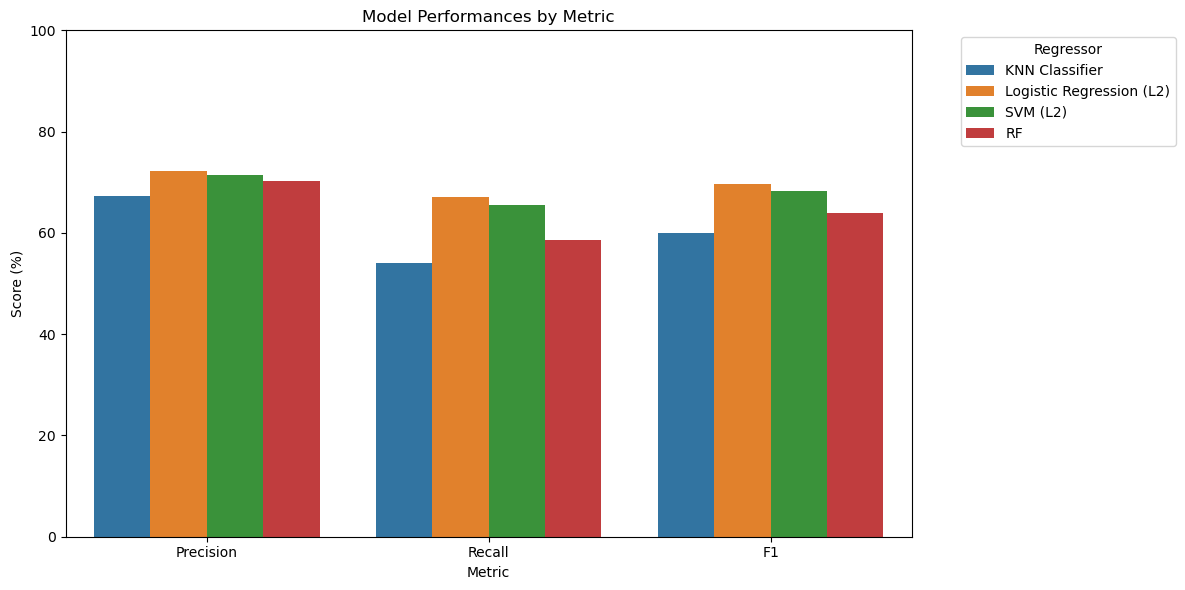

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

model_performances = pd.DataFrame(columns = ["Regressor", "Precision", "Recall", "F1" , "Hyperparams"])

for classifier in Classifiers:
    y_pred = Classifiers[classifier].predict(x_test)
    pres = f"{sklearn.metrics.precision_score(y_test, y_pred, pos_label='good'): .2%}"
    rec = f"{sklearn.metrics.recall_score(y_test, y_pred, pos_label='good'):.2%}"
    f1= f"{sklearn.metrics.f1_score(y_test, y_pred, pos_label='good'):.2%}"
    hp = Hyperparams.get(classifier)
    model_performances.loc[len(model_performances)] = [classifier, pres, rec, f1, hp]

# First, convert percentages (string) back to float numbers
model_perf_plot = model_performances.copy()
for metric in ["Precision", "Recall", "F1"]:
    model_perf_plot[metric] = model_perf_plot[metric].str.replace('%', '').astype(float)

# Melt the dataframe to long format for seaborn
model_perf_melted = model_perf_plot.melt(id_vars=["Regressor"], 
                                         value_vars=["Precision", "Recall", "F1"],
                                         var_name="Metric", 
                                         value_name="Score")

# Create the grouped barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=model_perf_melted, x="Metric", y="Score", hue="Regressor")

# Beautify it
plt.title("Model Performances by Metric")
plt.ylabel("Score (%)")
plt.ylim(0, 100)
plt.legend(title="Regressor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


We see that Logistic Regression leads across all metrics, followed closesly by SVM. To see how these Precision and Recall values actually translate to prediction, we can take a look at the models' confusion matrices.

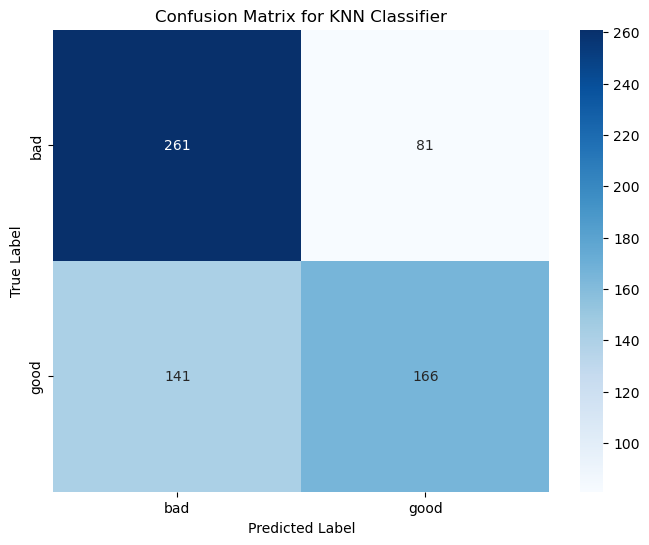

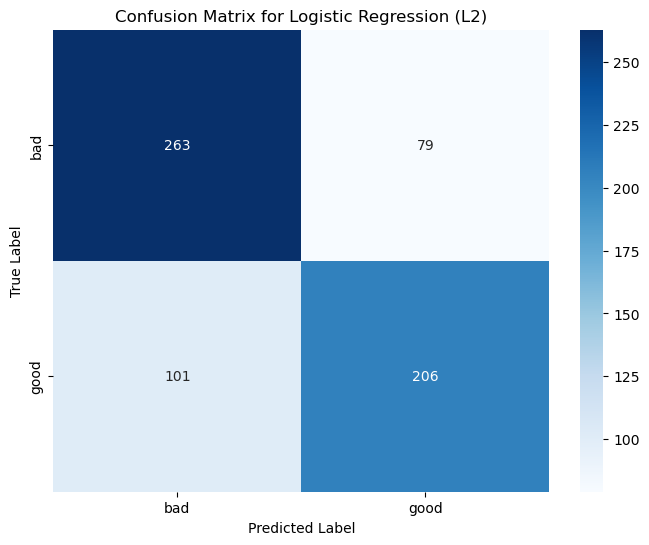

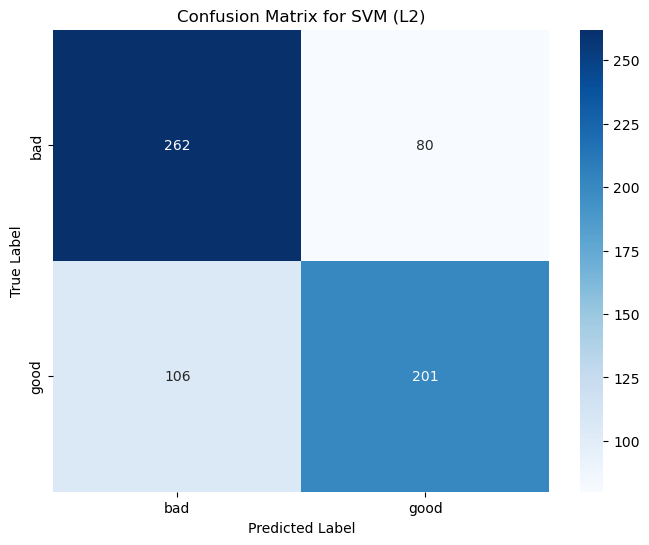

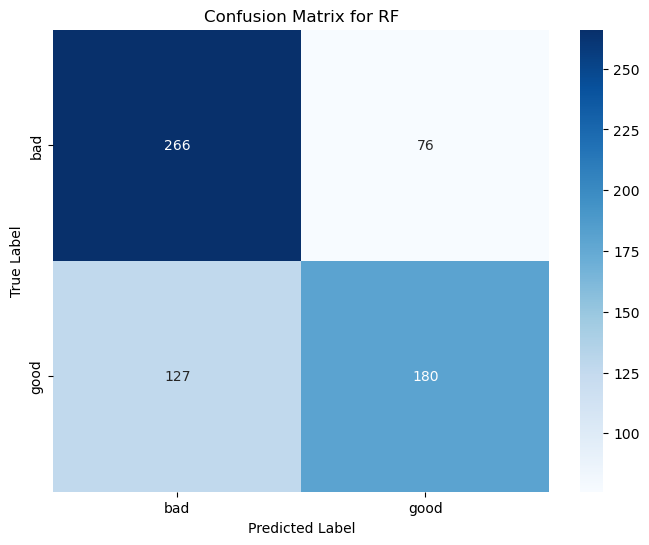

In [260]:
for classifier in Classifiers:
    model = Classifiers[classifier]
    y_pred = model.predict(x_test)
    
    # Compute the confusion matrix, specifying labels to ensure an n x n matrix
    cm = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Plot the confusion matrix using seaborn's heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {classifier}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

From the validation accuracies, we see that Logistic Regression (L2) performs the best. This is confirmed by the confusion matrix for this model. The model is adequately able to classify the classes along the diagonals. However, there seems to be a slight tendency towards predicting 'bad', as can be seen by the greater number of actual good films being misclassfied as bad compared to bad films being misclassified as good.

### Feature Importances
We can determine how the model treats its features using the weights. Since our chosen model is a linear model, the coefficients correspond roughly to their importance. We can start by visualizing the top 30 features by coefficient.

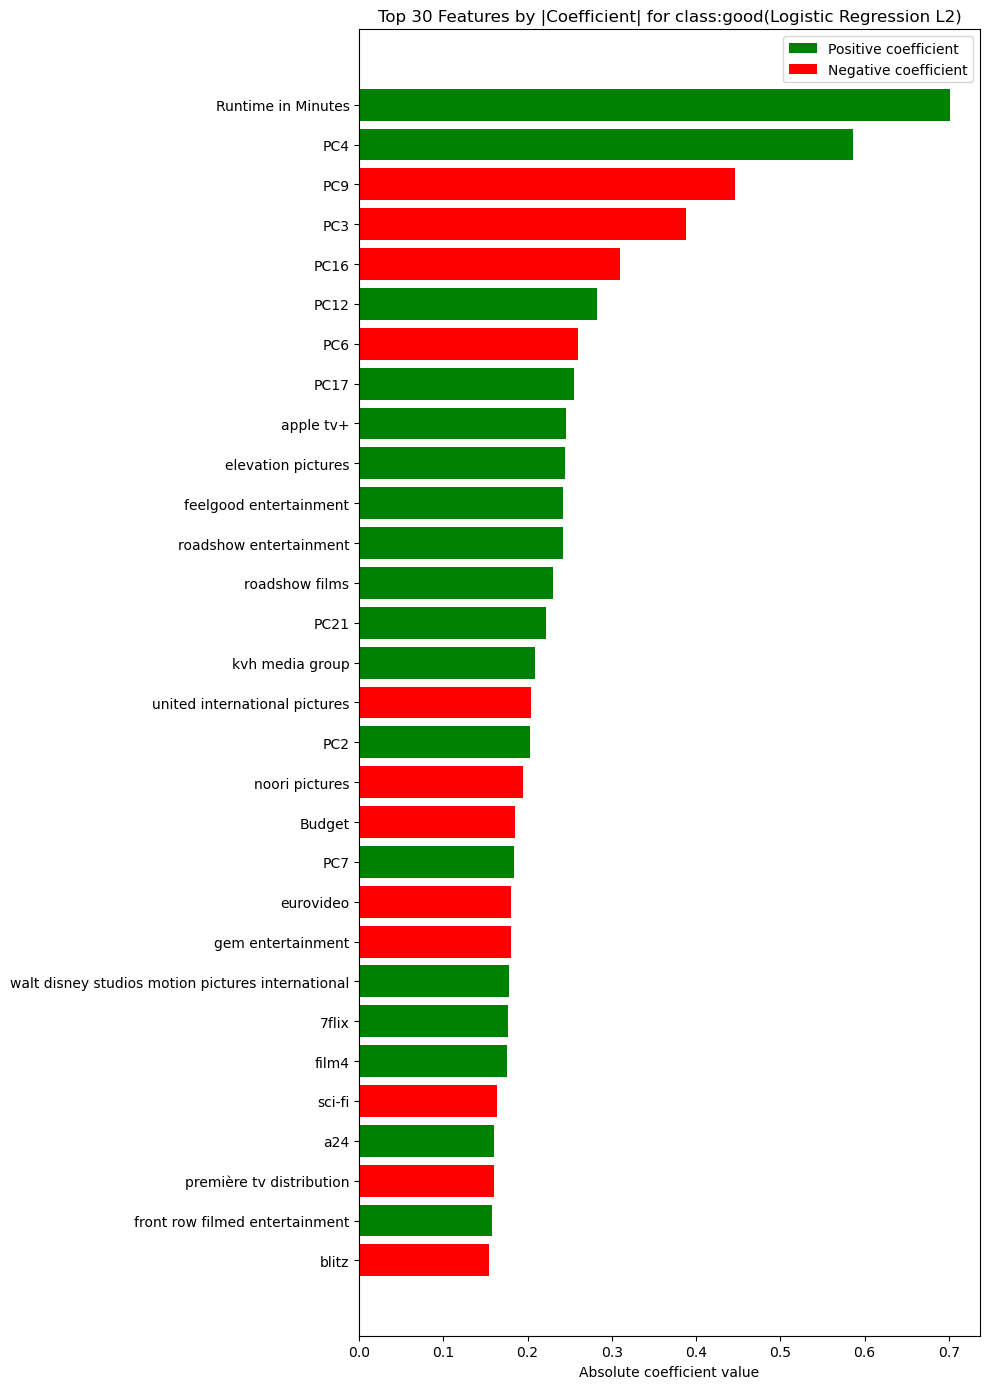

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# === CONFIGURE THIS ===
top_n      =  30         # ← pick how many features to show
horizontal = True       # ← False for vertical bars
pos_color  = 'green'
neg_color  = 'red'
# ======================

# Assume you already have:
model    = Classifiers['Logistic Regression (L2)']
features = list(x_nontest.columns)

# 1. Extract and rank by absolute magnitude
coefs     = model.coef_[0]
abs_coefs = np.abs(coefs)
top_idx   = np.argsort(abs_coefs)[-top_n:]
# sort top indices so the largest is first in the bar chart
sorted_idx = top_idx[np.argsort(abs_coefs[top_idx])[::-1]]

# 2. Prepare data for plotting
names       = [features[i]    for i in sorted_idx]
orig_vals   = coefs[sorted_idx]
abs_vals    = abs_coefs[sorted_idx]
bar_colors  = [pos_color if v >= 0 else neg_color for v in orig_vals]

# 3. Plot
plt.figure(figsize=(10, 0.4 * top_n + 2))

if horizontal:
    plt.barh(names, abs_vals, color=bar_colors)
    plt.gca().invert_yaxis()   # highest magnitude on top
    plt.xlabel("Absolute coefficient value")
else:
    plt.bar(names, abs_vals, color=bar_colors)
    plt.xticks(rotation=90)
    plt.ylabel("Absolute coefficient value")

# 4. Legend
legend_patches = [
    Patch(facecolor=pos_color, label="Positive coefficient"),
    Patch(facecolor=neg_color, label="Negative coefficient")
]
plt.legend(handles=legend_patches, loc='best')

class_ = model.classes_[1]

plt.title(f"Top {top_n} Features by |Coefficient| for class:{class_}(Logistic Regression L2)")
plt.tight_layout()
plt.show()


We see that Runtime is our top predictor, followed closesly by 7 Principal components. Then comes some of the producers and distributors. While some of the features are understandable, the principal components are a little harder to interpret. To aid in interpretation, we can visualize some of these principal components using a biplot.

In [262]:
%run eda2.ipynb

Defaulting to user installation because normal site-packages is not writeable
Successfully Imported


(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='PC4', ylabel='PC9'>)

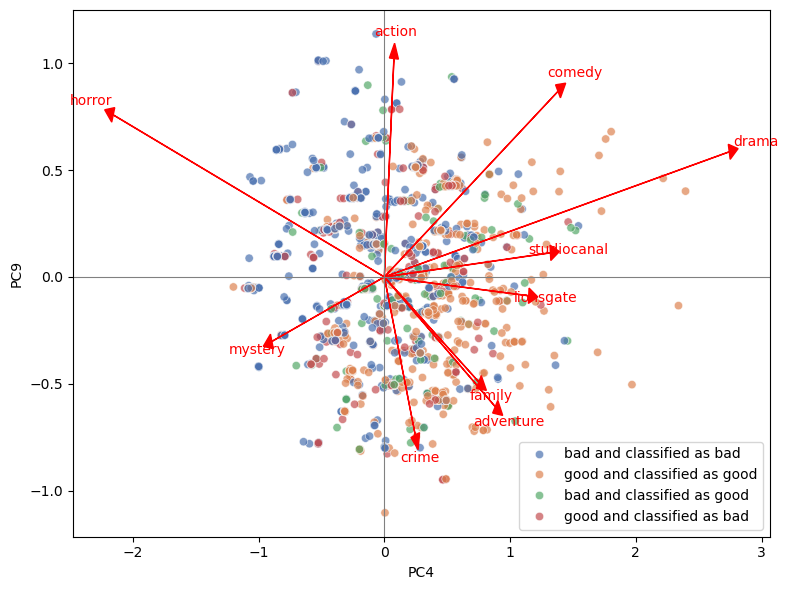

In [263]:
y_pred   = model.predict(x_nontest)
y_actual = y_nontest['Rating']

y_class = [
    f"{actual} and classified as {pred}"
    for actual, pred in zip(y_actual, y_pred)
]

biplot(x_nontest_copy[feature_dict['tokens']], x_nontest[feature_dict['PCS']], feature_names=None, pc_indices=(3, 8), top_arrows=10, arrow_scale=None, figsize=(8, 6), title=None, predictions=y_class)

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='PC3', ylabel='PC16'>)

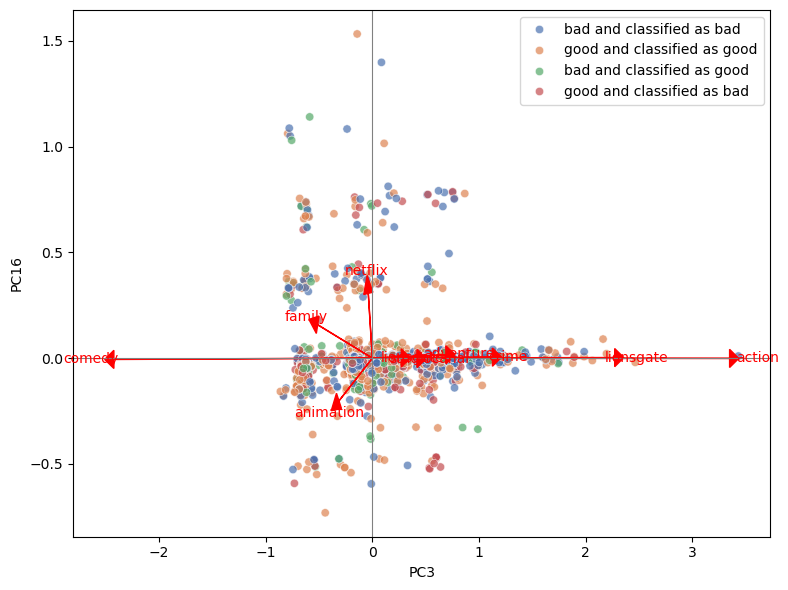

In [264]:
biplot(x_nontest_copy[feature_dict['tokens']], x_nontest[feature_dict['PCS']], feature_names=None, pc_indices=(2, 15), top_arrows=10, arrow_scale=None, figsize=(8, 6), predictions=y_class)

We see some distinct clustering, especially in the biplots for PC16 and PC3. However, upon labeling based on the actual and predicted class, these clusters seem unrelated to either the actual quality of the movie, or how the movie is perceieved by our model. Thus, to find out more about our model's behavior with regard to the principal components, we can use wordclouds again. This time, the size of the word is proportional to the magnitude of the vector of the transformed token in the PC space. We can still use color to show the direction of this vector.

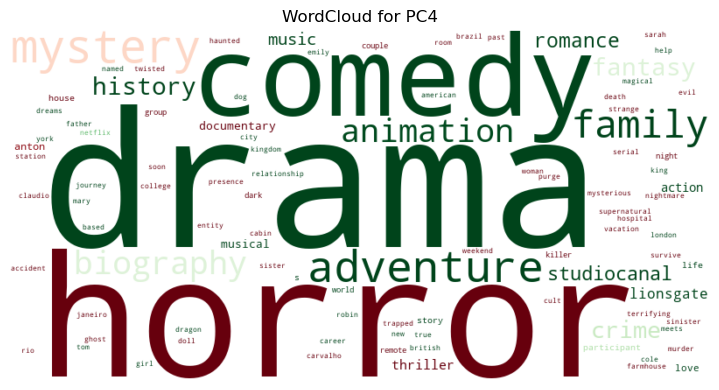

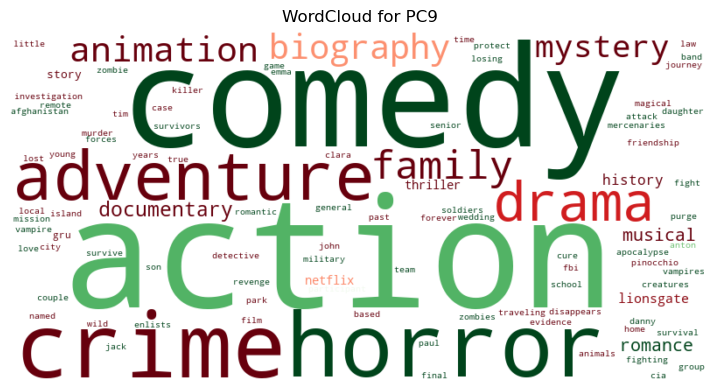

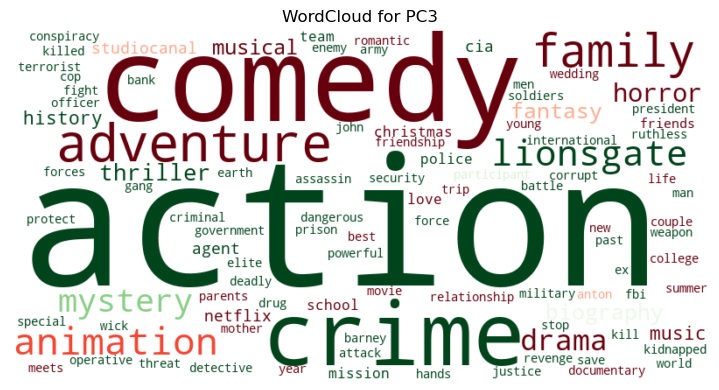

In [265]:
X_tokens = x_nontest_copy[feature_dict['tokens']]
pcs_scores = pca.transform(X_tokens)  
pcs = [4, 9, 3]


for pc in pcs:
    wc3, fig3, ax3 = wordcloud_pc(
        orig=X_tokens,              # your original token counts
        pcs=pcs_scores,            # the matrix of PC scores
        feature_names=None,        # will pull column names from X_tokens
        pc_index=pc-1,                # 0‐based index → PC3
        max_words=100,             
        width=800,                 
        height=400,                
        scale=1,                   
        colormap_positive='Greens',  
        colormap_negative='Reds',
        background_color='white',  
        title=f'WordCloud for PC{pc}'
    )

We see that across the top 3 principal components, keywords which correspond to genre are very prominent. However, their directions are sometimes opposite one another.

---

## IV. Discussion

We see that the final model is able to generalize to new data with up to 72% accuracy. Using the baseline of $1.25 * PCC=62.68%$, we can conclude that the model does have some predictive power. It is also noteworthy that the linear models tended to perform better in this task compared to the tree-based models. This is interesting to note as a paper by Thomal, [Sentiment Analysis of IMDb Movie Reviews](https://www.researchgate.net/publication/381285499_Sentiment_Analysis_of_IMDb_Movie_Reviews) found a similar pattern while doing sentiment analysis on IMDB review ratings. This could suggest that this domain in particular is well-suited for linear models—although more research is needed to conclude or disprove this.

When it comes to the model coefficients, the runtime had the highest weights. This is quite surprising for a few reasons. From the initial EDA, the variance of this feature was very low, as can be visually seen by the very short IQR. This would seem to suggest that this feature may not be that informative since the model could have a harder time distinguishes values from each other. It also had quite a bit of outlying films which skewed it towards higher runtimes. Despite these drawbacks, and after a log-transform and standard scaling, seems to be positively associated with the rating.

Another counterintuitive conclusion is the budget feature, which is negatively associated with the rating. There are studies, like those by [Murschetz et al.](https://journals.aau.dk/index.php/NJMM/article/view/5871) which testify to the importance of budget when it comes to Movie Quality prediction. However their study did not mention whether budget is a positive or negative indicator. However, this negative association may not be as counter-intuitive as it seems if we remember huge budget films which flopped. In fact, IMDB hosts a list of [such films](https://www.imdb.com/list/ls052417006/).

The actors and directors also failed to appear in the top 30 features. One possible reason for this is the approach by which these features were extracted. Studies like those by [Bruneel et al.](https://journals.aau.dk/index.php/NJMM/article/view/5871/5505) considered star power and director power using metrics like number of appearances and award nominations. Our model only considers the former.

The limitation of this approach can also be seen in the distributors and producers. Despite some distributors and producers being in the top 30 important features, these are features which are not in the top 20 in their category in terms of frequency. *United International Picture* is a notable exception to this, as it is in the top 30 important features while also being the number one distributor in terms of frequency.

Finally, we move on to the principal components. Recall that these principal component correspond to the tokens in the plot summary. If we look at the biplots of top 4 principal components, we can see some very small 'clusters' where the points seem to overlap. These clusters are even more distinct and separated when looking at PC3 and PC16. However, as mentioned earlier, there seems to be theme here that corresponds cleanly to the actual movie quality or predicted movie quality.

This leads us to the word clouds for the PCS. By far the largest contributors are the keywords which correspond to genre. This is simillar to the token distribution in the initial EDA. However, it seems each PC specializes in detecting certain binaries of genre. For example, PC3 is positively associated with "Action, Crime, Thriller" while being negatively associated with "Family, Comedy, Adventure". The fact that these genres are already accounted for in the PCs may explain why the genres are not in the top predictors.

---

## IV. Conclusion

In the end, our group was able to come up with a model that can accurately predict binary movie quality with 72% accuracy. While the features considered should in no way be taken as exhaustive, the model does perform significantly better than chance. However, as with any artistic endeavor, filmmaking is complex project with a lot of dynamic features. Thus, our model is not a final decider of which movies should be produced or not. Rather, it should be used as an additional step in a series of screening steps.